In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

I used index_col method to use date column as index.

In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
data_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
data_source = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

### Data Preprocessing

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

In [5]:
data_train.head(10)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


In [6]:
data_train.isna().sum()

final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 86, dtype: int64

In [7]:
data_train.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)

In [8]:
data_train=data_train.fillna(method='ffill')

I will replace all missing values with ffill method which replaces them with the previous value.

In [9]:
#Calculating recovery
recovery= (data_train['rougher.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']))\
/ (data_train['rougher.input.feed_au'] * (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au'])) * 100

In [10]:
recovery.head(10)

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
2016-01-15 05:00:00    88.156912
2016-01-15 06:00:00    88.168065
2016-01-15 07:00:00    87.668336
2016-01-15 08:00:00    87.035862
2016-01-15 09:00:00    87.650868
dtype: float64

There are abnormal and inf values which I believe is due to division of 0 by 0. I will replace them with 0.00000.

In [11]:
recovery.replace(-0.000000, 0.000000, inplace=True)

In [12]:
recovery.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
recovery.fillna(0.000000, inplace=True)

In [14]:
mean_absolute_error(recovery,data_train['rougher.output.recovery'])

9.317053768151204e-15

The mae value is extremely low high which means,there's almost no difference between the values. 

In [15]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

No output type paramater is present in the test dataset.

In [16]:
data_test.head(10)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,-497.903666,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,-497.923683,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,-503.451306,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,-499.890350,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716


In [17]:
data_test = data_test.fillna(method='ffill')

In [18]:
data_source.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [19]:
data_source.isna().sum()

final.output.concentrate_ag                     89
final.output.concentrate_pb                     87
final.output.concentrate_sol                   385
final.output.concentrate_au                     86
final.output.recovery                         1963
                                              ... 
secondary_cleaner.state.floatbank5_a_level     101
secondary_cleaner.state.floatbank5_b_air       101
secondary_cleaner.state.floatbank5_b_level     100
secondary_cleaner.state.floatbank6_a_air       119
secondary_cleaner.state.floatbank6_a_level     101
Length: 86, dtype: int64

### Analyzing The Data

In [20]:
data_train['final.output.concentrate_au'].mean()

44.00379162105571

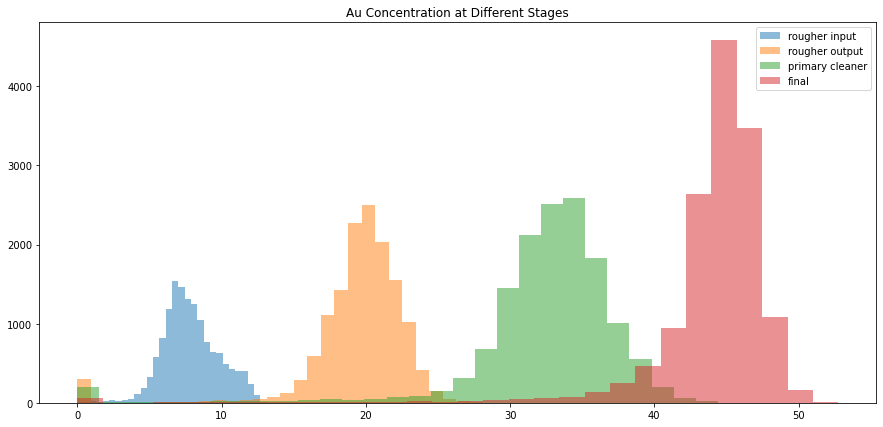

In [21]:
plt.figure(figsize=(15,7))
plt.hist(data_train['rougher.input.feed_au'], bins=30,alpha=0.5)
plt.hist(data_train['rougher.output.concentrate_au'], bins=30,alpha=0.5)
plt.hist(data_train['primary_cleaner.output.concentrate_au'], bins=30,alpha=0.5)
plt.hist(data_train['final.output.concentrate_au'], bins=30,alpha=0.5)
plt.legend(['rougher input', 'rougher output', 'primary cleaner', 'final'])
plt.title('Au Concentration at Different Stages')
plt.show()

The concentration of Au increases at every stage and reaches up to 44,on average, in final stage.

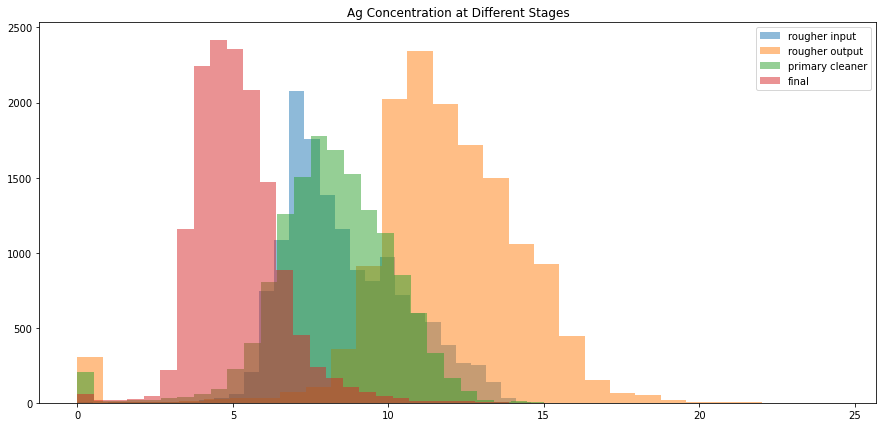

In [22]:
plt.figure(figsize=(15,7))
plt.hist(data_train['rougher.input.feed_ag'], bins=30,alpha=0.5)
plt.hist(data_train['rougher.output.concentrate_ag'], bins=30,alpha=0.5)
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], bins=30,alpha=0.5)
plt.hist(data_train['final.output.concentrate_ag'], bins=30,alpha=0.5)
plt.legend(['rougher input', 'rougher output', 'primary cleaner', 'final'])
plt.title('Ag Concentration at Different Stages')
plt.show()

Ag concentration increases in the rougher output stage but at the end, the beginning concentration is higher than the final concentration in average.

In [23]:
data_train['primary_cleaner.output.concentrate_pb'].mean()

9.568544006770484

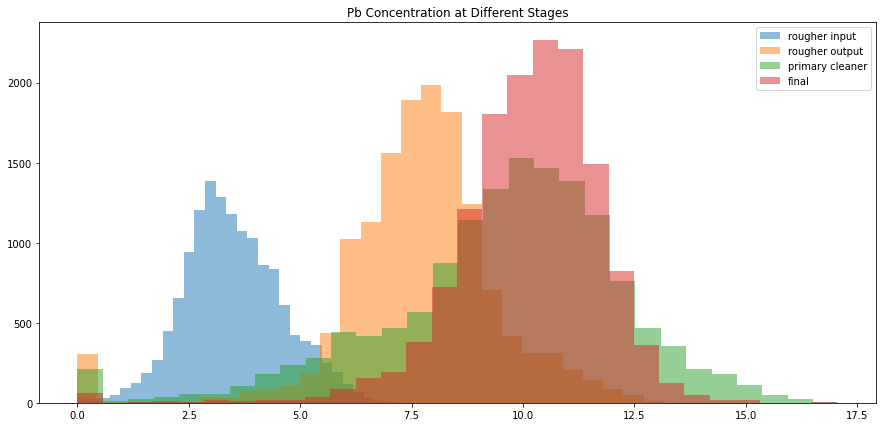

In [24]:
plt.figure(figsize=(15,7))
plt.hist(data_train['rougher.input.feed_pb'], bins=30, alpha=0.5)
plt.hist(data_train['rougher.output.concentrate_pb'], bins=30,alpha=0.5)
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], bins=30,alpha=0.5)
plt.hist(data_train['final.output.concentrate_pb'], bins=30,alpha=0.5)
plt.legend(['rougher input', 'rougher output', 'primary cleaner', 'final'])
plt.title('Pb Concentration at Different Stages')
plt.show()

On average, the final pb concentration is almost 10 times higher than the input concentration. It starts increasing at the rougher output stage and the average concentration of primary cleaner and final stage is really close but the distrubution of primary cleaner stage is broader compared to final stage. 

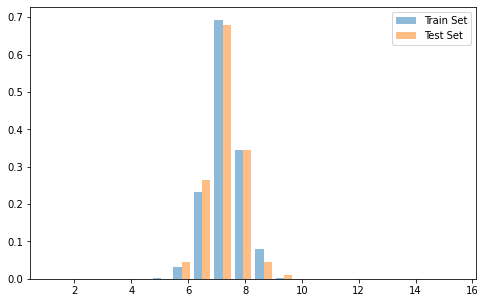

In [25]:
plt.figure(figsize=(8,5))
plt.hist([data_train['primary_cleaner.input.feed_size'],data_test['primary_cleaner.input.feed_size']], bins=20, alpha=0.5,density=True)
plt.legend(['Train Set', 'Test Set'])
plt.show()

The distribution is almost symmetrical and there's no significant difference between the train and the test dataset.

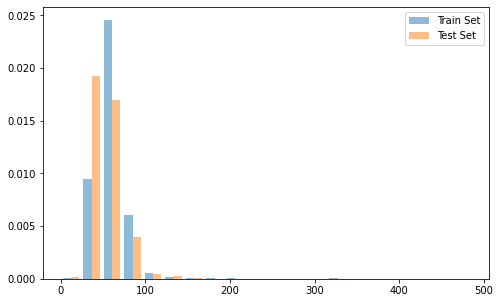

In [26]:
plt.figure(figsize=(8,5))
plt.hist([data_train['rougher.input.feed_size'],data_test['rougher.input.feed_size']], bins=20,alpha=0.5,density=True)
plt.legend(['Train Set', 'Test Set'])
plt.show()

The distribution is skewed left and there's no significant difference between the train and the test dataset.

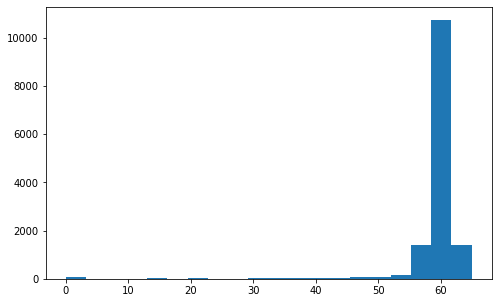

In [27]:
column_names = ['final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb']
plt.figure(figsize=(8,5))
plt.hist(data_train[column_names].sum(axis=1), bins=20)
plt.show()

In [28]:
data_train = data_train[~np.all(data_train[column_names] == 0, axis=1)]

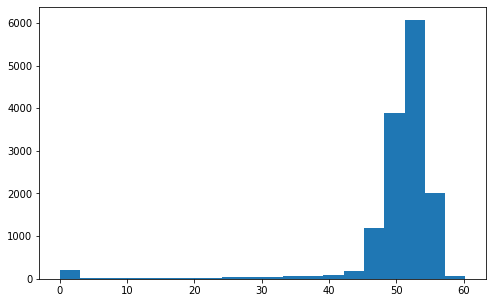

In [29]:
column_names2 = ['primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_pb']
plt.figure(figsize=(8,5))
plt.hist(data_train[column_names2].sum(axis=1), bins=20)
plt.show()

In [30]:
data_train = data_train[~np.all(data_train[column_names2] == 0, axis=1)]

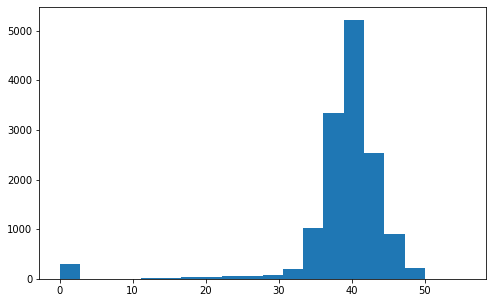

In [31]:
column_names3 = ['rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb']
plt.figure(figsize=(8,5))
plt.hist(data_train[column_names3].sum(axis=1), bins=20)
plt.show()

In [32]:
data_train = data_train[~np.all(data_train[column_names3] == 0, axis=1)]

The rows where the sum of all metal concentrations is 0 are removed.

### Building Models

In [33]:
#Calculating sMAPE
def smape(actual, prediction):
    error = np.abs(actual - prediction)
    scale = (np.abs(actual) + np.abs(prediction)) / 2
    
    return (error / scale).mean()

In [34]:
#Final sMAPE
def final_smape(actual, predicted):
    return 0.25 * smape(actual[0], predicted[:,0]) + 0.75 * smape(actual[1], predicted[:,1])

In [35]:
features = data_test.columns.values
features_train = data_train[features].reset_index(drop=True)
target_train = data_train[['rougher.output.recovery','final.output.recovery']]

In [36]:
target_train.columns=[0,1]

In [37]:
features_test = data_test[features].reset_index(drop=True)
target_test = data_source[['rougher.output.recovery','final.output.recovery']].loc[data_test.index].reset_index(drop=True)

In [38]:
target_test.columns=[0,1]

In [40]:
scoring = make_scorer(final_smape)

In [41]:
for max_depth in range (1, 15):
    model = DecisionTreeRegressor(random_state=42,max_depth=max_depth)
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    score = cross_val_score(model, features_train, target_train, cv=cv, scoring=scoring)
    final_score = score.sum() / len(score)
    print('max_depth =', max_depth, final_score)

max_depth = 1 0.0855114095908974
max_depth = 2 0.08152490466174972
max_depth = 3 0.07714525051470451
max_depth = 4 0.07438239766265031
max_depth = 5 0.07245402142199268
max_depth = 6 0.07105965776951037
max_depth = 7 0.06927427915729337
max_depth = 8 0.06740650878690266
max_depth = 9 0.06652284877424847
max_depth = 10 0.06542211068212626
max_depth = 11 0.06466800423327765
max_depth = 12 0.06437255399155226
max_depth = 13 0.06474158481109243
max_depth = 14 0.06495613151590421


The best score decision tree model gives is 0.064 with max_depth of 12.

In [42]:
best_est = []
best_depth = []
for est in (1,10):
    for max_depth in range (1, 10):
        model = RandomForestRegressor(random_state=42,n_estimators=est,max_depth=max_depth)
        cv = KFold(n_splits=10, shuffle=True, random_state=42)
        score = cross_val_score(model, features_train, target_train, cv=cv, scoring=scoring)
        final_score = score.sum() / len(score)
        if final_score.max():
            best_est = est
            best_depth = max_depth

print('max_depth =', best_depth, 'bes_est =', best_est, 'final_score =', final_score)

max_depth = 9 bes_est = 10 final_score = 0.0590635609543777


In [43]:
model_lin = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores_lin = cross_val_score(model_lin, features_train, target_train, cv=cv, scoring=scoring)
print('Final score:', scores_lin.sum() / len(scores_lin))

Final score: 0.07218437474186593


I will continue with random forest model as it gives a better score.


In [70]:
model = RandomForestRegressor(random_state=42, n_estimators=10, max_depth=9)

In [71]:
model.fit(features_train, target_train)

RandomForestRegressor(max_depth=9, n_estimators=10, random_state=42)

In [72]:
predicted = model.predict(features_test)

In [73]:
smape(target_test, predicted)

0    0.084805
1    0.108480
dtype: float64

In [74]:
final_smape(target_test, predicted)

0.10256096065201435

In [129]:
dummy = DummyRegressor(strategy='mean')

In [130]:
dummy.fit(features_train, target_train)

DummyRegressor()

In [133]:
dummy_pred = dummy.predict(features_test)

In [134]:
final_smape(target_test, dummy_pred)

0.10530005410701679

### Conclusion

Datasets were preprocessed and missing values were replaced by the previous values. Recovery was calculated and the mae was found to be 9.3e-15 which means, there's almost no difference bertween the values. The change of concentrations of metals (Au, Ag, Pb) depending on the purification stage was found. The concentration of Au increases at every stage and reaches up to 44,on average, in final stage. Ag concentration increases in the rougher output stage but at the end, the beginning concentration is higher than the final concentration in average. On average, the final pb concentration is almost 10 times higher than the input concentration. It starts increasing at the rougher output stage and the average concentration of primary cleaner and final stage is really close but the distrubution of primary cleaner stage is broader compared to final stage. The feed particle size distributions in the training set and in the test set was compared and no significant difference was found. The total concentrations of all substances at different stages was plotted and abnormal values were eliminated. Different models were evaluated and Random forest was found to be the better choice with a score of 0.059. Final smape was found to be 0.10 whereas the final smape of dummy variables is 0.11 meaning the model is well fitted.